In [6]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [135]:
def quadtree(n):
    h = np.power(2., -n);
    nl = 1;
    for i in range(n):
        nl *= 2
    x = 0.5*h + h*np.linspace(0, nl, nl, endpoint=False)
    y = 0.5*h + h*np.linspace(0, nl, nl, endpoint=False)
    tree =  np.meshgrid(x,y)
    return tree

In [136]:
def fx(x,y):
    return np.exp(-32*(x**2 + y**2))

def FX(x,y):
    f = np.copy(x)
    I,J = np.shape(x)
    for i in range(I):
        for j in range(J):
            f[i][j] = 1.0 - fx(x[i][j], y[i][j])
    return f
    

In [137]:
x3 = quadtree(3)[0]
y3 = quadtree(3)[1]

#exact vaalue at level 3
FX3 = FX(x3,y3)
FX3

array([[0.22119922, 0.7134952 , 0.96122579, 0.99806955, 0.99996464,
        0.99999976, 1.        , 1.        ],
       [0.7134952 , 0.89460078, 0.98573577, 0.99928983, 0.99998699,
        0.99999991, 1.        , 1.        ],
       [0.96122579, 0.98573577, 0.99806955, 0.99990389, 0.99999824,
        0.99999999, 1.        , 1.        ],
       [0.99806955, 0.99928983, 0.99990389, 0.99999521, 0.99999991,
        1.        , 1.        , 1.        ],
       [0.99996464, 0.99998699, 0.99999824, 0.99999991, 1.        ,
        1.        , 1.        , 1.        ],
       [0.99999976, 0.99999991, 0.99999999, 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]])

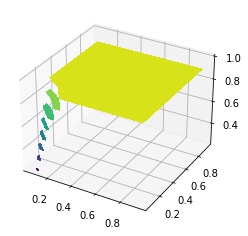

In [138]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#ax.plot_surface(x, y, FX3)
ax.contourf(x3, y3, FX3)

In [139]:
def restriction(fxl):
    #restricts or averages from l to l-1
    N = len(fxl[0]);
    fx = np.meshgrid(np.zeros(N),np.zeros(N))[0]
    _i=2; _j=2;
    for i in range(N):
        if (i%2 == 1):
            _j = 2
            for j in range(N):
                if (j%2 == 1):
                    val = 0.25*(fxl[i-1][j] + fxl[i][j] + fxl[i-1][j-1] + fxl[i][j-1]); 
                    fx[_i][_j] = val
                    _j = _j + 1
            _i = _i+1;
    return fx;

downsample = restriction (FX3)

In [140]:
#irrelavant section
restriction(x3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.375, 0.625, 0.875, 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.375, 0.625, 0.875, 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.375, 0.625, 0.875, 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.375, 0.625, 0.875, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [141]:
def restriction2(fxl):
    #restricts or averages from l to l-1
    fx = np.copy(fxl)
    N = len(fxl[0]);
    I=2; J=2;
    for i in range(N):
        if (i%2 == 1):
            J = 2
            for j in range(N):
                if (j%2 == 1):
                    val = 0.25*(fxl[i-1][j] + fxl[i][j] + fxl[i-1][j-1] + fxl[i][j-1]); 
                    fx[I][J] = val
                    J = J + 1
            I = I+1;
    #with bc
    I = I-2
    J = J-2
    for i in range(I):
        _i = i + 2
        for j in range(2):
            _j = j + 2;
            _b = -(j+1) + 2
            fx[_i][_b] = fx[_i][_j]
            _b = j + 2 + J
            _j = -(j+1) + 2 + J
            fx[_i][_b] = fx[_i][_j]
    for j in range(J+4):
        _j = j
        for i in range(2):
            _i = i + 2;
            _b = -(i+1) + 2
            fx[_b][_j] = fx[_i][_j]
            _b = i + 2 + I
            _i = -(i+1) + 2 + I
            fx[_b][_j] = fx[_i][_j]
    return fx;

#downsample at level 2 (with 2 ghost layers at each boundary)
downsample = restriction2 (FX3)
downsample

array([[0.99946813, 0.98608023, 0.98608023, 0.99946813, 0.99999953,
        1.        , 1.        , 0.99999953],
       [0.98608023, 0.6356976 , 0.6356976 , 0.98608023, 0.99998783,
        1.        , 1.        , 0.99998783],
       [0.98608023, 0.6356976 , 0.6356976 , 0.98608023, 0.99998783,
        1.        , 1.        , 0.99998783],
       [0.99946813, 0.98608023, 0.98608023, 0.99946813, 0.99999953,
        1.        , 1.        , 0.99999953],
       [0.99999953, 0.99998783, 0.99998783, 0.99999953, 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.99999953, 0.99998783, 0.99998783, 0.99999953, 1.        ,
        1.        , 1.        , 1.        ]])

In [142]:
x2 = quadtree(2)[0]
y2 = quadtree(2)[1]

#exact vaalue at level 3
FX2 = FX(x2,y2)
FX2

array([[0.63212056, 0.99326205, 0.99999774, 1.        ],
       [0.99326205, 0.99987659, 0.99999996, 1.        ],
       [0.99999774, 0.99999996, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [143]:
#irrelavan section
restriction2(quadtree(3)[0])

array([[0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625],
       [0.375, 0.125, 0.125, 0.375, 0.625, 0.875, 0.875, 0.625]])

In [144]:
def prolongation(fx_c):
    #interpolates from l-1 to l
    N = len(fx_c[0]);
    fx = np.copy(fx_c)
    N2 = int(N/2)
    for i in range(N2):
        for j in range(N2):
            _i = i + 2
            _j = j + 2;
            for ic in range(2):
                for jc in range(2):
                    __i = _i-1 if (ic == 0) else _i+1
                    __j = _j-1 if (jc == 0) else _j+1
                    #prolongation
                    fx[2*i+ic][2*j+jc] = (fx_c[__i][__j] + 3*(fx_c[__i][_j]+ fx_c[_i][__j]) + 9*fx_c[_i][_j])/16.
    return fx;

upsample  = prolongation(downsample)
upsample

array([[0.6356976 , 0.72329326, 0.89848457, 0.98955713, 0.99651093,
        0.99999087, 0.99999696, 1.        ],
       [0.72329326, 0.78982675, 0.92289372, 0.99206809, 0.99734987,
        0.99999307, 0.99999769, 1.        ],
       [0.89848457, 0.92289372, 0.97171201, 0.99709002, 0.99902775,
        0.99999746, 0.99999915, 1.        ],
       [0.98955713, 0.99206809, 0.99709002, 0.99970065, 0.99989998,
        0.99999974, 0.99999991, 1.        ],
       [0.99651093, 0.99734987, 0.99902775, 0.99989998, 0.99996658,
        0.99999991, 0.99999997, 1.        ],
       [0.99999087, 0.99999307, 0.99999746, 0.99999974, 0.99999991,
        1.        , 1.        , 1.        ],
       [0.99999696, 0.99999769, 0.99999915, 0.99999991, 0.99999997,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]])

In [145]:
FX3

array([[0.22119922, 0.7134952 , 0.96122579, 0.99806955, 0.99996464,
        0.99999976, 1.        , 1.        ],
       [0.7134952 , 0.89460078, 0.98573577, 0.99928983, 0.99998699,
        0.99999991, 1.        , 1.        ],
       [0.96122579, 0.98573577, 0.99806955, 0.99990389, 0.99999824,
        0.99999999, 1.        , 1.        ],
       [0.99806955, 0.99928983, 0.99990389, 0.99999521, 0.99999991,
        1.        , 1.        , 1.        ],
       [0.99996464, 0.99998699, 0.99999824, 0.99999991, 1.        ,
        1.        , 1.        , 1.        ],
       [0.99999976, 0.99999991, 0.99999999, 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]])

In [146]:
error = abs(upsample - FX3)
error

array([[4.14498383e-01, 9.79805471e-03, 6.27412179e-02, 8.51241471e-03,
        3.45371389e-03, 8.89131568e-06, 3.04272844e-06, 2.01589301e-10],
       [9.79805471e-03, 1.04774030e-01, 6.28420457e-02, 7.22173112e-03,
        2.63712506e-03, 6.84673063e-06, 2.31134281e-06, 1.53328461e-10],
       [6.27412179e-02, 6.28420457e-02, 2.63575331e-02, 2.81386719e-03,
        9.70493934e-04, 2.53215293e-06, 8.48012831e-07, 5.62975222e-11],
       [8.51241471e-03, 7.22173112e-03, 2.81386719e-03, 2.94563747e-04,
        9.99279350e-05, 2.61111618e-07, 8.72364484e-08, 5.79269965e-12],
       [3.45371389e-03, 2.63712506e-03, 9.70493934e-04, 9.99279350e-05,
        3.34146423e-05, 8.74266013e-08, 2.91470695e-08, 1.93578487e-12],
       [8.89131568e-06, 6.84673063e-06, 2.53215293e-06, 2.61111618e-07,
        8.74266013e-08, 2.28717045e-10, 7.62664376e-11, 4.99600361e-15],
       [3.04272844e-06, 2.31134281e-06, 8.48012831e-07, 8.72364484e-08,
        2.91470695e-08, 7.62664376e-11, 2.54233301e-11, 1.

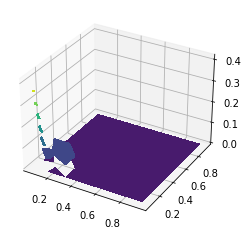

In [147]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#ax.plot_surface(x, y, FX3)
ax.contourf(x3, y3, error)

In [8]:
#restricted to coarser level


[0.0029849477689738754,
 0.05117684480092002,
 0.3370492643007508,
 0.8620364182326757,
 0.8620364182326757,
 0.3370492643007508,
 0.05117684480092002,
 0.0029849477689738754]